<a href="https://colab.research.google.com/github/Shreekanth1512/CQF-project-file/blob/main/Rolling_corr_Nifty_vs_Gold.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install numpy pandas matplotlib yfinance

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [ ]:
start = "2023-01-01"
end = "2025-12-26"


nifty = yf.Ticker("^NSEI").history(start=start, end=end)
gold = yf.Ticker("GLD").history(start=start, end=end)
sp500 = yf.Ticker("^GSPC").history(start=start, end=end)


In [ ]:
df = pd.DataFrame({
    "nifty": nifty["Close"],
    "gold": gold["Close"],
    "sp500": sp500["Close"]
})

df.dropna(inplace=True)
print(df.head())

Empty DataFrame
Columns: [nifty, gold, sp500]
Index: []


In [ ]:
df.head()

,nifty,gold,sp500
Date,,,


In [ ]:
gold = yf.Ticker("GLD").history(start=start, end=end)
sp500 = yf.Ticker("^GSPC").history(start=start, end=end)
nifty = yf.Ticker("^NSEI").history(start=start, end=end)


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-12-18 00:00:00+05:30,25764.699219,25902.349609,25726.300781,25815.550781,197600,0.0,0.0
2025-12-19 00:00:00+05:30,25911.500000,25993.349609,25880.449219,25966.400391,382900,0.0,0.0
2025-12-22 00:00:00+05:30,26055.849609,26180.699219,26047.800781,26172.400391,253000,0.0,0.0
2025-12-23 00:00:00+05:30,26205.199219,26233.550781,26119.050781,26177.150391,216600,0.0,0.0
2025-12-24 00:00:00+05:30,26170.650391,26236.400391,26123.000000,26142.099609,188800,0.0,0.0


In [ ]:
df = pd.DataFrame({
    "^NSEI": nifty["Close"],
    "GLD": gold["Close"],
    "^GSPC": sp500["Close"]
})

print(df.head())

                                  ^NSEI         GLD        ^GSPC
Date                                                            
2023-01-01 18:30:00+00:00  18197.449219         NaN          NaN
2023-01-02 18:30:00+00:00  18232.550781         NaN          NaN
2023-01-03 05:00:00+00:00           NaN  171.059998  3824.139893
2023-01-03 18:30:00+00:00  18042.949219         NaN          NaN
2023-01-04 05:00:00+00:00           NaN  172.669998  3852.969971


In [ ]:
df = df.copy()
df.index = df.index.tz_localize(None)


In [ ]:
df.index = df.index.normalize()


In [ ]:
df = df.dropna()


In [ ]:
# Ensuring all serires are timezones-naive

nifty_close = nifty["Close"]
if nifty_close.index.tz is not None:
    nifty_close = nifty_close.tz_localize(None)

gold_close = gold["Close"]
if gold_close.index.tz is not None:
    gold_close = gold_close.tz_localize(None)

sp500_close = sp500["Close"]
if sp500_close.index.tz is not None:
    sp500_close = sp500_close.tz_localize(None)


df = pd.DataFrame({
    "^NSEI": nifty_close,
    "GLD": gold_close,
    "^GSPC": sp500_close
})


df.index = df.index.normalize()

df.dropna(inplace= True)

print(df.tail(30))



                   ^NSEI         GLD        ^GSPC
Date                                             
2025-11-12  25875.800781  385.989990  6850.919922
2025-11-13  25879.150391  382.869995  6737.490234
2025-11-14  25910.050781  375.959991  6734.109863
2025-11-17  26013.449219  371.649994  6672.410156
2025-11-18  25910.050781  374.350006  6617.319824
2025-11-19  26052.650391  374.959991  6642.160156
2025-11-20  26192.150391  374.850006  6538.759766
2025-11-21  26068.150391  374.269989  6602.990234
2025-11-24  25959.500000  380.200012  6705.120117
2025-11-25  25884.800781  380.079987  6765.879883
2025-11-26  26205.300781  383.119995  6812.609863
2025-11-28  26202.949219  387.880005  6849.089844
2025-12-01  26175.750000  389.750000  6812.629883
2025-12-02  26032.199219  387.239990  6829.370117
2025-12-03  25986.000000  386.880005  6849.720215
2025-12-04  26033.750000  387.130005  6857.120117
2025-12-05  26186.449219  386.440002  6870.399902
2025-12-08  25960.550781  385.420013  6846.509766


In [ ]:
returns["^GSPC_lag1"] = returns["^GSPC"].shift(1)
returns[["^NSEI", "^GSPC_lag1"]].corr()


,^NSEI,^GSPC_lag1
^NSEI,1.000000,0.249252
^GSPC_lag1,0.249252,1.000000


In [ ]:
window = 90  # you can try 30, 90, 252 as well

rolling_corr_nifty_gold = df["^NSEI"].rolling(window).corr(df["GLD"])
rolling_corr_nifty_sp = df["^NSEI"].rolling(window).corr(df["^GSPC"])
rolling_corr_gold_sp = df["GLD"].rolling(window).corr(df["^GSPC"])

rolling_corr_df = pd.DataFrame({
    "Nifty vs Gold": rolling_corr_nifty_gold,
    "Nifty vs S&P500": rolling_corr_nifty_sp,
    "Gold vs S&P500": rolling_corr_gold_sp
})

rolling_corr_df.dropna(inplace=True)

print(rolling_corr_df.tail())


            Nifty vs Gold  Nifty vs S&P500  Gold vs S&P500
Date                                                      
2025-12-18       0.829681         0.779477        0.851236
2025-12-19       0.827463         0.776236        0.848725
2025-12-22       0.827269         0.775122        0.848136
2025-12-23       0.825831         0.771117        0.847887
2025-12-24       0.824032         0.768681        0.846864


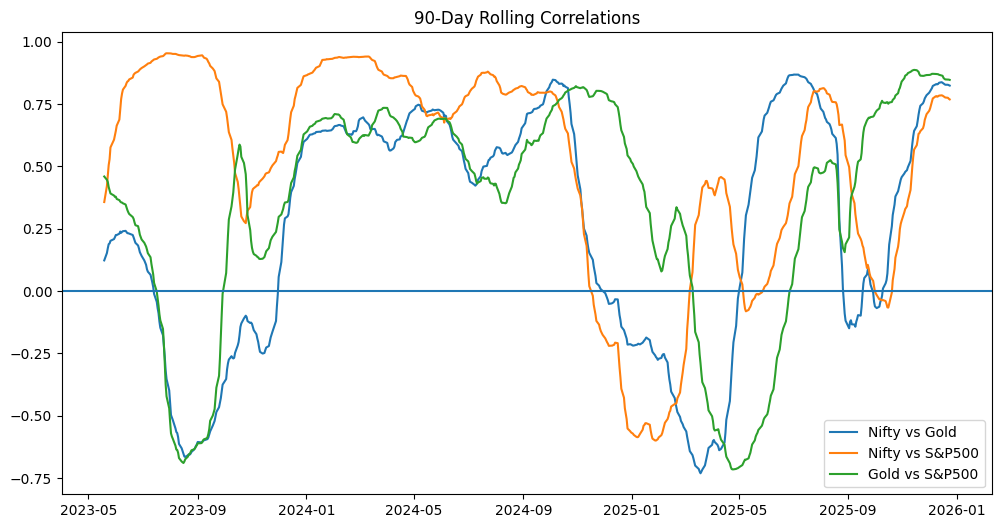

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(rolling_corr_df.index, rolling_corr_df["Nifty vs Gold"], label="Nifty vs Gold")
plt.plot(rolling_corr_df.index, rolling_corr_df["Nifty vs S&P500"], label="Nifty vs S&P500")
plt.plot(rolling_corr_df.index, rolling_corr_df["Gold vs S&P500"], label="Gold vs S&P500")

plt.axhline(0)
plt.legend()
plt.title(f"{window}-Day Rolling Correlations")
plt.show()


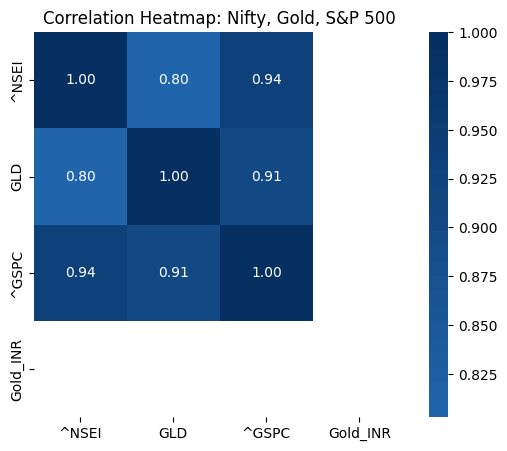

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df.corr()

plt.figure(figsize=(6,5))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="RdBu",
    center=0
)

plt.title("Correlation Heatmap: Nifty, Gold, S&P 500")
plt.show()


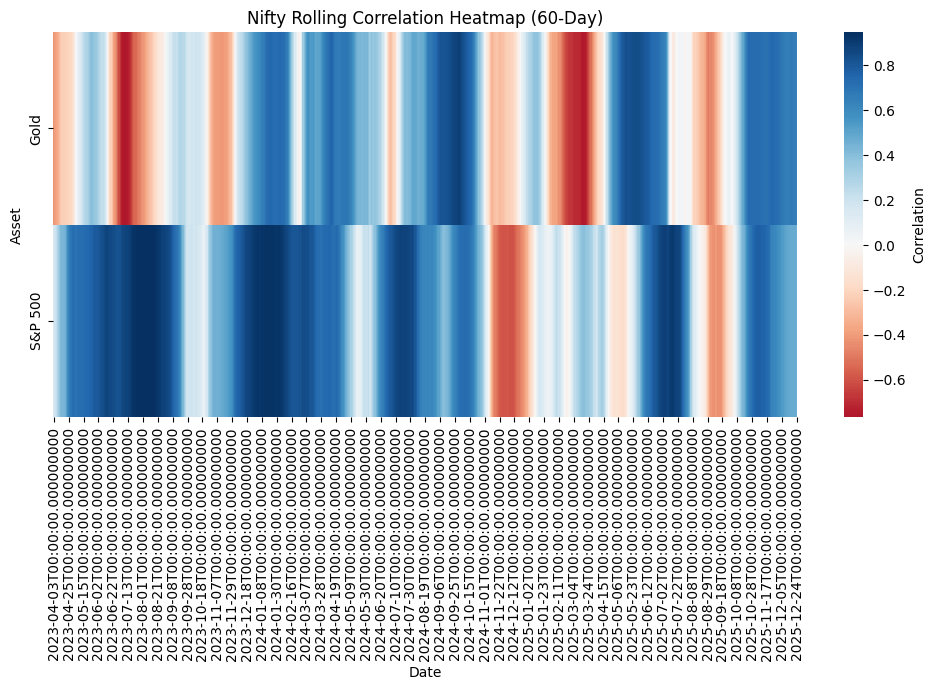

In [ ]:
window = 60

rolling_corr = pd.DataFrame({
    "Gold": df["^NSEI"].rolling(window).corr(df["GLD"]),
    "S&P 500": df["^NSEI"].rolling(window).corr(df["^GSPC"])
})

rolling_corr.dropna(inplace=True)

plt.figure(figsize=(12,5))
sns.heatmap(
    rolling_corr.T,
    cmap="RdBu",
    center=0,
    cbar_kws={"label": "Correlation"}
)

plt.title(f"Nifty Rolling Correlation Heatmap ({window}-Day)")
plt.xlabel("Date")
plt.ylabel("Asset")
plt.show()


In [ ]:
# computing rolling volatility

import numpy as np

returns = df["^NSEI"].pct_change()

vol_window = 30
rolling_vol = returns.rolling(vol_window).std() * np.sqrt(252)

# Regime thresholds (quantiles)
low_thr = rolling_vol.quantile(0.33)
high_thr = rolling_vol.quantile(0.66)

def vol_regime(vol):
    if vol < low_thr:
        return "Low Vol"
    elif vol < high_thr:
        return "Medium Vol"
    else:
        return "High Vol"

vol_regime_series = rolling_vol.dropna().apply(vol_regime)


In [ ]:
# rolling correlation + Z score

corr_window = 60
z_window = 252  # 1-year normalization

rolling_corr = df["^NSEI"].rolling(corr_window).corr(df["GLD"])
rolling_corr = rolling_corr.dropna()

rolling_corr_z = (
    (rolling_corr - rolling_corr.rolling(z_window).mean()) /
    rolling_corr.rolling(z_window).std()
)

rolling_corr_z.dropna(inplace=True)


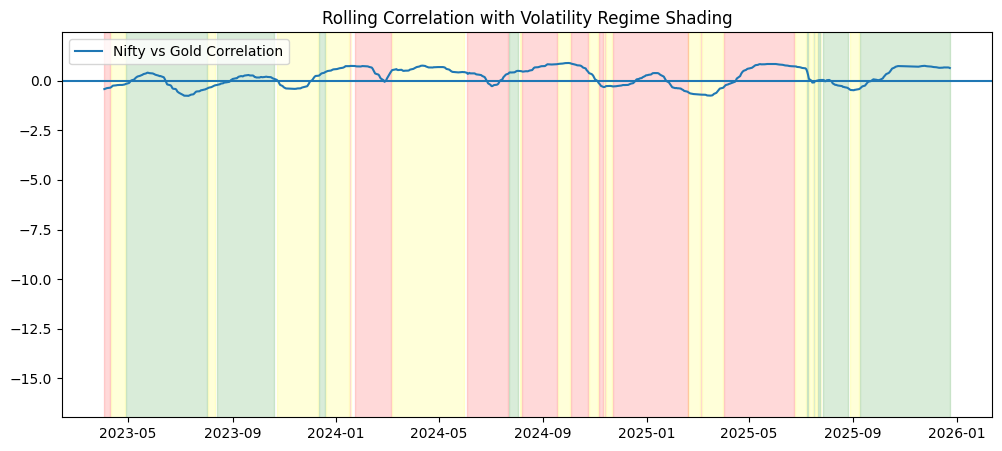

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12,5))

ax.plot(rolling_corr.index, rolling_corr, label="Nifty vs Gold Correlation")

# Background shading
for regime, color in zip(
    ["Low Vol", "Medium Vol", "High Vol"],
    ["green", "yellow", "red"]
):
    mask = vol_regime_series == regime
    ax.fill_between(
        rolling_corr.index,
        -1, 1,
        where=mask.reindex(rolling_corr.index, fill_value=False),
        color=color,
        alpha=0.15,
        transform=ax.get_xaxis_transform()
    )

ax.axhline(0)
ax.set_title("Rolling Correlation with Volatility Regime Shading")
ax.legend()
plt.show()


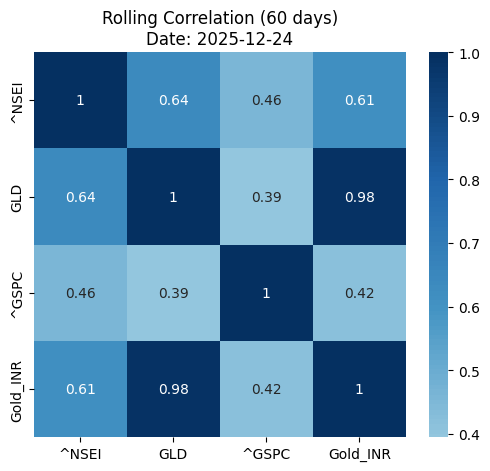

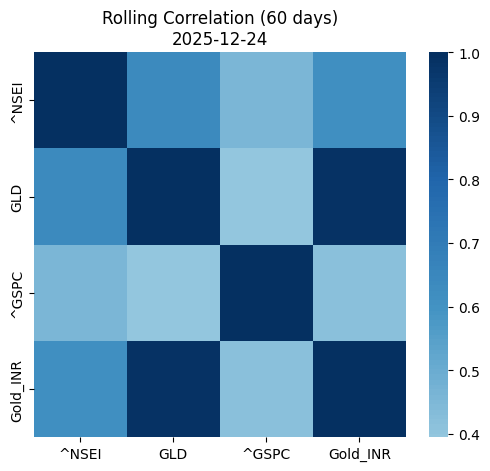

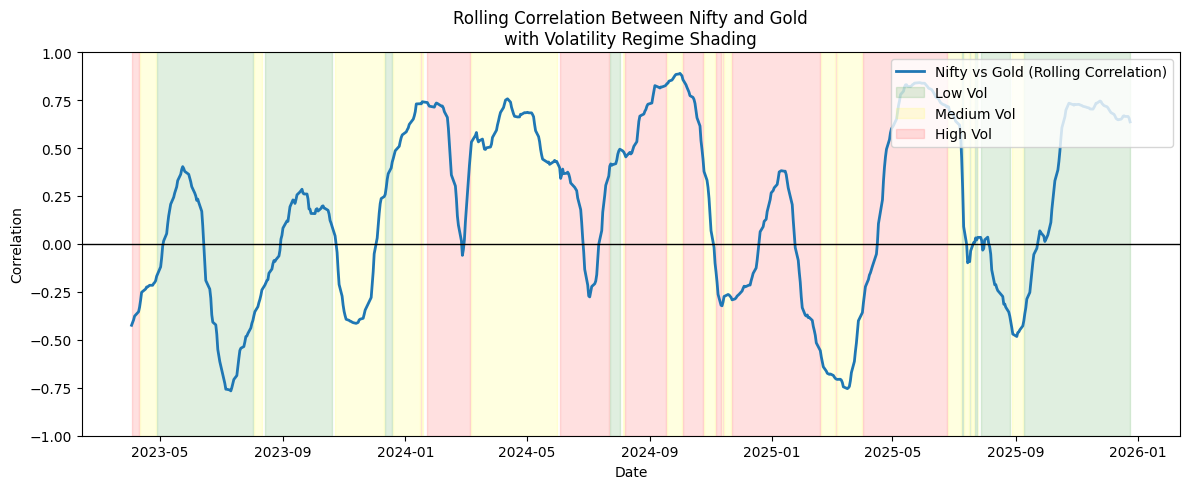

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Align indices
common_index = rolling_corr.index.intersection(vol_regime_series.index)
rolling_corr_plot = rolling_corr.loc[common_index]
vol_regime_plot = vol_regime_series.loc[common_index]

fig, ax = plt.subplots(figsize=(12,5))

ax.plot(
    rolling_corr_plot.index,
    rolling_corr_plot,
    label="Nifty vs Gold (Rolling Correlation)",
    linewidth=2
)

# Volatility regime shading
regime_colors = {
    "Low Vol": "green",
    "Medium Vol": "yellow",
    "High Vol": "red"
}

for regime, color in regime_colors.items():
    mask = vol_regime_plot == regime
    ax.fill_between(
        rolling_corr_plot.index,
        -1, 1,
        where=mask,
        color=color,
        alpha=0.12,
        label=regime
    )

ax.axhline(0, color="black", linewidth=1)
ax.set_ylim(-1, 1)

ax.set_title("Rolling Correlation Between Nifty and Gold\nwith Volatility Regime Shading")
ax.set_ylabel("Correlation")
ax.set_xlabel("Date")
ax.legend(loc="upper right")

plt.tight_layout()
plt.show()


In [ ]:
import plotly.graph_objects as go

# Align indices
common_index = rolling_corr.index.intersection(vol_regime_series.index)
rolling_corr_plot = rolling_corr.loc[common_index]
vol_regime_plot = vol_regime_series.loc[common_index]

fig = go.Figure()

# Rolling correlation line
fig.add_trace(
    go.Scatter(
        x=rolling_corr_plot.index,
        y=rolling_corr_plot,
        mode="lines",
        name="Nifty vs Gold (Rolling Correlation)",
        line=dict(width=2),
        hovertemplate="Date: %{x}<br>Correlation: %{y:.2f}<extra></extra>"
    )
)

# Volatility regime colors (RGBA for transparency)
regime_colors = {
    "Low Vol": "rgba(44,160,44,0.15)",
    "Medium Vol": "rgba(255,127,14,0.15)",
    "High Vol": "rgba(214,39,40,0.15)"
}

# Regime block shading
regime_blocks = vol_regime_plot.ne(vol_regime_plot.shift()).cumsum()

for _, block in vol_regime_plot.groupby(regime_blocks):
    regime = block.iloc[0]
    fig.add_vrect(
        x0=block.index.min(),
        x1=block.index.max(),
        xref="x",
        fillcolor=regime_colors[regime],
        layer="below",
        line_width=0
    )

# Reference lines
fig.add_hline(y=0, line=dict(color="black", width=1))
fig.add_hline(y=0.3, line=dict(dash="dash", width=0.8))
fig.add_hline(y=-0.3, line=dict(dash="dash", width=0.8))

# Layout
fig.update_layout(
    title=(
        "Rolling Correlation: Nifty vs Gold (INR)<br>"
        "<sup>Shaded by Equity Volatility Regimes</sup>"
    ),
    xaxis_title="Date",
    yaxis_title="Correlation",
    yaxis=dict(range=[-1, 1]),
    template="plotly_white",
    hovermode="x unified",
    legend=dict(orientation="h", y=1.05, x=1, xanchor="right")
)

fig.show()


In [ ]:
from IPython.display import HTML

html_content = """
<h2>Rolling Correlation: Nifty vs INR-Adjusted Gold</h2>
<p>This visualization shows regime-dependent correlation dynamics...</p>
"""

HTML(html_content)
